In [1]:
import linearmodels.panel as pnd
import statsmodels.api as sm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df=pd.read_csv('airfare.csv')

- Setting up the panel data in format required

In [3]:
id = pd.Categorical(df.id)
year = pd.Categorical(df.year)
df=df.set_index(['id','year'])
df['id']=id
df['year']=year
df['log(fare)']=np.log(df.fare)
df['log(dist)']=np.log(df.dist)
df['[log(dist)]^2']=np.square(np.log(df.dist))

In [4]:
df

origin               destin  dist  passen  fare  bmktshr  \
id   year                                                                     
1    1997       AKRON, OH          ATLANTA, GA   528     152   106   0.8386   
     1998       AKRON, OH          ATLANTA, GA   528     265   106   0.8133   
     1999       AKRON, OH          ATLANTA, GA   528     336   113   0.8262   
     2000       AKRON, OH          ATLANTA, GA   528     298   123   0.8612   
2    1997       AKRON, OH          ORLANDO, FL   861     282   104   0.5798   
...                   ...                  ...   ...     ...   ...      ...   
1148 2000      TUCSON, AZ       WASHINGTON, DC  1948     198   311   0.4272   
1149 1997  WASHINGTON, DC  WEST PALM BEACH, FL   857     493   147   0.7089   
     1998  WASHINGTON, DC  WEST PALM BEACH, FL   857     523   142   0.7797   
     1999  WASHINGTON, DC  WEST PALM BEACH, FL   857     441   146   0.7465   
     2000  WASHINGTON, DC  WEST PALM BEACH, FL   857     556   145   0.8122   

           concen    id  year  log(fare)  log(dist)  [log(dist)]^2  
id   year                                                           
1    1997  0.8386     1  1997   4.663439   6.269096      39.301568  
     1998  0.8133     1  1998   4.663439   6.269096      39.301568  
     1999  0.8262     1  1999   4.727388   6.269096      39.301568  
     2000  0.8612     1  2000   4.812184   6.269096      39.301568  
2    1997  0.5798     2  1997   4.644391   6.758095      45.671841  
...           ...   ...   ...        ...        ...            ...  
1148 2000  0.4272  1148  2000   5.739793   7.574558      57.373936  
1149 1997  0.7089  1149  1997   4.990433   6.753438      45.608924  
     1998  0.7797  1149  1998   4.955827   6.753438      45.608924  
     1999  0.7465  1149  1999   4.983607   6.753438      45.608924  
     2000  0.8122  1149  2000   4.976734   6.753438      45.608924  

[4596 rows x 12 columns]

## Task 1

In [43]:
y_var=df['log(fare)']
X_var=sm.add_constant(df[['year','concen','log(dist)','[log(dist)]^2']])

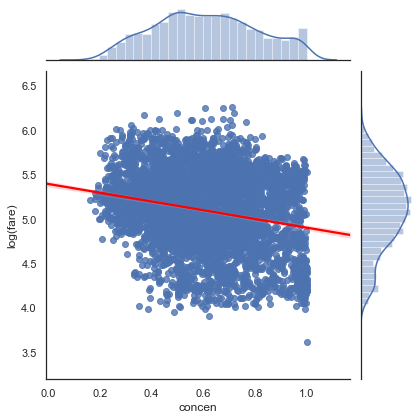

In [6]:
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=df['concen'], y=df['log(fare)'], kind='reg',joint_kws={'line_kws':{'color':'red'}})
plt.show()

- We can observe that as concentration increases, the variance of fare decreases --> Heteroskedasticity

- Pooled OLS


In [7]:
#Unadjusted
Pooledmod = pnd.PooledOLS(y_var, X_var)
Pooled_res = Pooledmod.fit()
print(Pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:              log(fare)   R-squared:                        0.4062
Estimator:                  PooledOLS   R-squared (Between):              0.4215
No. Observations:                4596   R-squared (Within):               0.1246
Date:                Sun, May 31 2020   R-squared (Overall):              0.4062
Time:                        21:41:15   Log-likelihood                   -1512.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      523.18
Entities:                        1149   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                  F(6,4589)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             523.18
                            

In [8]:
y_var

id    year
1     1997    4.663439
      1998    4.663439
      1999    4.727388
      2000    4.812184
2     1997    4.644391
                ...   
1148  2000    5.739793
1149  1997    4.990433
      1998    4.955827
      1999    4.983607
      2000    4.976734
Name: log(fare), Length: 4596, dtype: float64

In [9]:
X_var

const  year  concen  log(dist)  [log(dist)]^2
id   year                                               
1    1997    1.0  1997  0.8386   6.269096      39.301568
     1998    1.0  1998  0.8133   6.269096      39.301568
     1999    1.0  1999  0.8262   6.269096      39.301568
     2000    1.0  2000  0.8612   6.269096      39.301568
2    1997    1.0  1997  0.5798   6.758095      45.671841
...          ...   ...     ...        ...            ...
1148 2000    1.0  2000  0.4272   7.574558      57.373936
1149 1997    1.0  1997  0.7089   6.753438      45.608924
     1998    1.0  1998  0.7797   6.753438      45.608924
     1999    1.0  1999  0.7465   6.753438      45.608924
     2000    1.0  2000  0.8122   6.753438      45.608924

[4596 rows x 5 columns]

- Pooled OLS with white's Robust Cov adjusted

In [10]:
#White's method
Pooledmod_robust = pnd.PooledOLS(y_var, X_var)
Pooled_res_robust = Pooledmod.fit(cov_type='robust')
print(Pooled_res_robust)

                          PooledOLS Estimation Summary                          
Dep. Variable:              log(fare)   R-squared:                        0.4062
Estimator:                  PooledOLS   R-squared (Between):              0.4215
No. Observations:                4596   R-squared (Within):               0.1246
Date:                Sun, May 31 2020   R-squared (Overall):              0.4062
Time:                        21:41:15   Log-likelihood                   -1512.3
Cov. Estimator:                Robust                                           
                                        F-statistic:                      523.18
Entities:                        1149   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                  F(6,4589)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             558.39
                            

In [11]:
print('The range for dist is [{},{}]'.format(df.dist.describe().min(),df.dist.describe().max()))

The range for dist is [95.0,4596.0]


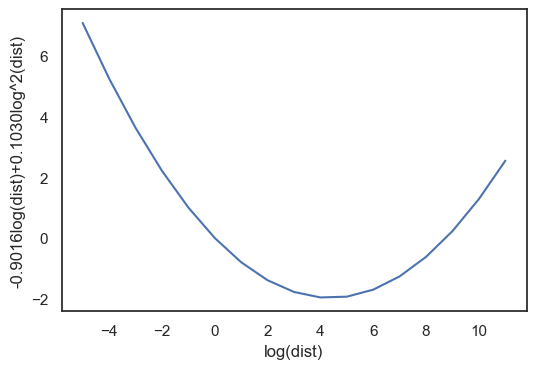

In [12]:
plt.figure(dpi=100)
x=np.arange(-5,12)
plt.plot(x,-0.9016*x+0.1030*x**2)
plt.xlabel('log(dist)')
plt.ylabel('-0.9016log(dist)+0.1030log^2(dist)')
plt.show()

In [13]:
print('The turning point for dist starts at',round(np.exp(4.38),2))

The turning point for dist starts at 79.84


- Random Effect Model

In [44]:
REmod=pnd.RandomEffects(y_var,X_var)
re_res=REmod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:              log(fare)   R-squared:                        0.2285
Estimator:              RandomEffects   R-squared (Between):              0.4175
No. Observations:                4596   R-squared (Within):               0.1348
Date:                Sun, May 31 2020   R-squared (Overall):              0.4029
Time:                        21:57:57   Log-likelihood                    3771.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      226.57
Entities:                        1149   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                  F(6,4589)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             226.57
                            

In [15]:
re_res.variance_decomposition

Effects                   0.102251
Residual                  0.011351
Percent due to Effects    0.900078
Name: Variance Decomposition, dtype: float64

In [16]:
re_res.theta.head()

,theta
id,
1,0.83567
2,0.83567
3,0.83567
4,0.83567
5,0.83567


In [17]:
Fixedmod_year =pnd.PanelOLS(y_var, X_var, entity_effects=True, drop_absorbed=True)
fe_res= Fixedmod_year.fit(cov_type='unadjusted')
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:              log(fare)   R-squared:                        0.1352
Estimator:                   PanelOLS   R-squared (Between):             -0.0417
No. Observations:                4596   R-squared (Within):               0.1352
Date:                Sun, May 31 2020   R-squared (Overall):             -0.0325
Time:                        21:41:16   Log-likelihood                    4435.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      134.61
Entities:                        1149   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                  F(4,3443)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             134.61
                            

/opt/anaconda3/lib/python3.7/site-packages/linearmodels/panel/model.py:1669: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

log(dist), [log(dist)]^2

  AbsorbingEffectWarning,


In [18]:
#Hausman test
beta=(fe_res.params - re_res.params).dropna()
se =fe_res.cov.loc[beta.index,beta.index] - re_res.cov.loc[beta.index,beta.index]
hausman = np.dot(beta.T,np.linalg.inv(se)).dot(beta)

In [20]:
pval = stats.chi2.sf(hausman, beta.size)
pval

0.2176347126109598

## Task 2

### Q1

In [21]:
concenbar=df['concen'].groupby('id').mean()

In [22]:
concenbar.rename('concenbar',inplace=True)

id
1       0.834825
2       0.608000
3       0.786175
4       0.431700
5       0.510200
          ...   
1145    0.924350
1146    0.981625
1147    0.597000
1148    0.484000
1149    0.761825
Name: concenbar, Length: 1149, dtype: float64

In [23]:
df = df.join(concenbar,how='left')

In [24]:
concenbar.value_counts()

0.687500    2
0.654100    2
0.518675    2
0.517575    2
0.500300    2
           ..
0.427700    1
0.291100    1
0.832200    1
0.792800    1
0.287550    1
Name: concenbar, Length: 1140, dtype: int64

In [25]:
concenbar.min()

0.1862

In [26]:
concenbar.max()

0.9997

### Q2

In [27]:
y_var=df['log(fare)']
X_var=sm.add_constant(df[['year','concen','log(dist)','[log(dist)]^2','concenbar']])

In [28]:
REmod=pnd.RandomEffects(y_var,X_var)
re_res=REmod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:              log(fare)   R-squared:                        0.2302
Estimator:              RandomEffects   R-squared (Between):              0.4216
No. Observations:                4596   R-squared (Within):               0.1352
Date:                Sun, May 31 2020   R-squared (Overall):              0.4068
Time:                        21:43:07   Log-likelihood                    3776.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      195.96
Entities:                        1149   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                  F(7,4588)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             195.96
                            

In [29]:
re_res.variance_decomposition

Effects                   0.102342
Residual                  0.011355
Percent due to Effects    0.900132
Name: Variance Decomposition, dtype: float64

### Q3

In [74]:
#X_var=sm.add_constant(df[['year','concen']])

X_var=sm.add_constant(df[['year','concen','concenbar']])
REmod=pnd.RandomEffects(y_var,X_var)
re_res=REmod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:              log(fare)   R-squared:                        0.1171
Estimator:              RandomEffects   R-squared (Between):              0.0576
No. Observations:                4596   R-squared (Within):               0.1352
Date:                Mon, Jun 01 2020   R-squared (Overall):              0.0616
Time:                        11:17:22   Log-likelihood                    3776.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      121.77
Entities:                        1149   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                  F(5,4590)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             121.77
                            